Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el álgebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de técnicas relacionadas con el aprendizaje automático. Con ella, podemos describir el proceso de propagación hacia adelante en una red neuronal, identificar mínimos locales en funciones multivariables (crucial para el proceso de retropropagación) o la descripción y empleo de métodos de reducción de la dimensionalidad, como el análisis de componentes principales (PCA), entre muchas otras aplicaciones. 

Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello, el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada variante en términos del coste computacional del mismo. En este caso en particular, y a modo de ilustración, nos centraremos en el cálculo del determinante de una matriz.

In [1]:
import numpy as np
import random
import time 
import pandas as pd

## a) Implementa una funcion, determinante_recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definicion recursiva de Laplace.



La función **determinante_recursivo** calcula el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace. 

Primero, la función verifica si la matriz es de 1x1 o de 2x2. Si es de 1x1, el determinante es el único elemento de la matriz. Si es de 2x2, el determinante se calcula directamente utilizando la fórmula matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0].

Si la matriz no es ni de 1x1 ni de 2x2, se aplica la **definición recursiva de Laplace** para calcular el determinante. Para ello, se inicializa una variable determinante en 0.

Luego, se itera sobre cada columna i de la matriz. 

Para cada columna i, se crea una submatriz eliminando la primera fila y la columna i. Esto se hace utilizando la comprensión de listas 

<p style="text-align:center;">[fila[:i] + fila[i+1:] for fila in matriz [1:]]


Después, **se calcula el determinante** de la submatriz utilizando la función determinante_recursivo **recursivamente**.

Finalmente, se suma o resta el determinante de la submatriz al determinante total según corresponda. 

- Si i es par, se suma 
- Si i es impar, se resta. 

Esto se hace multiplicando el elemento matriz[0][i] por el determinante de la submatriz y sumándolo o restando al determinante total.

Una vez que se han iterado todas las columnas, se devuelve el valor del determinante calculado.

Esta función utiliza la definición recursiva de Laplace para calcular el determinante de una matriz cuadrada. En cada llamada recursiva, se reduce el tamaño de la matriz hasta llegar a los casos base (matrices de 1x1 o 2x2), donde el determinante se puede calcular directamente.

<p style="text-align:center;"><strong><em> De esta manera, se puede calcular el determinante de cualquier matriz cuadrada. </em></strong></p>

In [2]:
def determinante_recursivo(matriz):
    # Caso base: si la matriz es de 1x1, el determinante es el único elemento de la matriz
    if len(matriz) == 1:
        return matriz[0][0]
    # Caso base: si la matriz es de 2x2, el determinante se calcula directamente
    elif len(matriz) == 2:
        return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]
    else:
        # Caso recursivo: se calcula el determinante utilizando la definición recursiva de Laplace
        determinante = 0
        for i in range(len(matriz)):
            # Se crea una submatriz eliminando la primera fila y la columna i
            submatriz = [np.concatenate((fila[:i], fila[i+1:])) for fila in matriz[1:]]
            # Se calcula el determinante de la submatriz utilizando la función recursivamente
            det_submatriz = determinante_recursivo(submatriz)
            # Se suma o resta el determinante de la submatriz al determinante total según corresponda
            if i % 2 == 0:
                determinante += matriz[0][i] * det_submatriz
            else:
                determinante -= matriz[0][i] * det_submatriz
        return determinante

In [3]:
# Definimos una matriz de 3x3
matriz = [[3, 2, -3],
          [7, -1, 0],
          [2, -4, 5]]

# Calculamos el determinante de la matriz utilizando la función determinante_recursivo
determinante = determinante_recursivo(matriz)


# Imprimimos el resultado
print(f"El determinante de la matriz es: {determinante}")


El determinante de la matriz es: -7.0


In [4]:
# Definimos una matriz de 4x4
matriz = [[5, 3, 1, 0],
          [-1, 2, 5, -2],
          [3, -1, -2, 0],
          [-5, 0, -3, 1]]

# Calculamos el determinante de la matriz utilizando la función determinante_recursivo
determinante = determinante_recursivo(matriz)

# Imprimimos el resultado
print(f"El determinante de la matriz es: {determinante}")

El determinante de la matriz es: -95.0


## b) Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.


Supongamos que tenemos una matriz triangular superior `A` de tamaño `3x3` como la siguiente:

$$
A = \begin{bmatrix}
a & b & c \\
0 & d & e \\
0 & 0 & f
\end{bmatrix}
$$

Para calcular el determinante de esta matriz, podemos utilizar la **definición recursiva de Laplace** expandiendo por la primera fila. 

Esto nos da:

$$
\det(A) = a \det \begin{bmatrix} d & e \\ 0 & f \end{bmatrix} - b \det \begin{bmatrix} 0 & e \\ 0 & f \end{bmatrix} + c \det \begin{bmatrix} 0 & d \\ 0 & 0 \end{bmatrix}
$$

Si observamos las submatrices resultantes, podemos ver que **todas son matrices triangulares superiores.** 
También se observa la **segunda y tercera submatrices** tienen una fila de ceros, lo que significa que sus **determinantes son cero.** Por lo tanto, la ecuación anterior se simplifica a:

$$
\det(A) = a \det \begin{bmatrix} d & e \\ 0 & f \end{bmatrix}
$$


Ahora podemos calcular el determinante de la submatriz `2x2` utilizando la fórmula directa para matrices `2x2`:

$$
\det(A) = a (df - 0e) = adf
$$
$$
\det(A) = a \cdot d \cdot f 
$$

El determinante de la matriz `A` resulta ser el **producto de los elementos en su diagonal principal**: `a * d * f`.

Este mismo razonamiento se puede aplicar a matrices triangulares superiores o inferiores de cualquier tamaño n×n.

<p style="text-align:center;"><strong><em> El determinante de una matriz triangular es igual al producto de los elementos en su diagonal principal.</em></strong></p>

In [5]:
# Definimos una matriz triangular superior
A = np.array([[1, 2, 3],
              [0, 4, 5],
              [0, 0, 6]])

# Calculamos el determinante de la matriz utilizando la función np.linalg.det
determinante = np.linalg.det(A)

# Imprimimos el resultado
print(f"El determinante de la matriz es: {determinante:.2f}")

El determinante de la matriz es: 24.00


## c) Determínese de forma justificada cómo alteran el determinante de una matriz n × n las dos operaciones elementales siguientes: 



### Intercambiar una fila (o columna) por otra fila (o columna): 

Si intercambiamos dos filas o dos columnas de una matriz, el determinante de la matriz resultante cambia de signo. Es decir, si el determinante original era D, después de intercambiar dos filas o dos columnas, el determinante será -D.


El determinante de una matriz cuadrada se puede calcular utilizando la definición recursiva de Laplace. 

Esta definición implica expandir el determinante en términos de los **cofactores de una fila o columna**. Cada cofactor se calcula **multiplicando un elemento de la matriz por el determinante de una submatriz más pequeña** y aplicando un **signo alternante.**

Cuando intercambiamos dos filas o dos columnas en una matriz, estamos cambiando la posición de los elementos en la matriz. Esto afecta el cálculo de los cofactores y, por lo tanto, el valor del determinante.

Para entender mejor cómo funciona esto, consideremos el caso de una matriz 2x2:
$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

El determinante de esta matriz se puede calcular directamente utilizando la fórmula : 
$$
a \cdot d - b \cdot c
$$

Ahora, si intercambiamos las dos filas de la matriz para obtener una nueva matriz B:
$$
B = \begin{bmatrix} c & d \\ a & b \end{bmatrix}
$$


El determinante de esta nueva matriz se puede calcular utilizando la misma fórmula:
$$
c \cdot b - d \cdot a
$$

Si comparamos este resultado con el determinante original de la matriz A, podemos ver que el signo ha cambiado:
$$
det(B)=c \cdot b - d \cdot a = - (a \cdot d - b \cdot c) = −det(A)
$$


Este mismo razonamiento se puede aplicar a matrices de cualquier tamaño. 

Cuando intercambiamos dos filas o dos columnas en una matriz, estamos **cambiando el signo de los cofactores y, por lo tanto, el signo del determinante.**

En resumen, el intercambio de filas o columnas en una matriz cambia el signo del determinante debido a cómo se calculan los cofactores en la definición recursiva de Laplace. 

<p style="text-align:center;"><strong><em> Si el determinante original era D, después del intercambio será -D.</em></strong></p>


In [6]:
# COMPROBACIÓN
A = np.array([[2, 1, -1],
             [-3, -1, 2],
             [-2, 1, 2]])

det_A = np.linalg.det(A)
form_det_A = format(det_A, ".5f")
print(f"El determinante de A es: {form_det_A}")


B = np.array([[-3, -1, 2],
              [2, 1, -1],             
              [-2, 1, 2]])

det_B = np.linalg.det(B)
form_det_B = format(det_B, ".5f")
print(f"El determinante de B es: {form_det_B}")


El determinante de A es: -1.00000
El determinante de B es: 1.00000


### Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

Si sumamos a una fila (o columna) otra fila (o columna) multiplicada por un escalar α, **el determinante de la matriz no cambia.** 



Esto se debe a que esta operación elemental es equivalente a sumar el determinante de dos matrices: la matriz original y otra matriz que tiene todas las filas (o columnas) iguales a la matriz original excepto la fila (o columna) que se está modificando, que es igual a la fila (o columna) multiplicada por el escalar α. 

Como esta segunda matriz tiene dos filas (o columnas) iguales, su determinante es cero. Por lo tanto, al sumar el determinante de la matriz original y el determinante de esta segunda matriz, obtenemos el mismo valor que el determinante original.

Por ejemplo, si tenemos la matriz A:
$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$
El determinante de A es 
$$
a \cdot d - b \cdot c
$$

D=ad−bc. 
Si sumamos a la primera fila la segunda fila multiplicada por un escalar α para obtener la matriz B:
$$
B = \begin{bmatrix} a + \alpha\cdot c  &  b + \alpha\cdot d\\ c & d \end{bmatrix}
$$
El determinante de B es 
$$
det(B) = (a + \alpha\cdot c) \cdot d - ( b + \alpha\cdot d) \cdot c = (a \cdot d) + (\alpha \cdot c \cdot d) - (b \cdot c) - (\alpha \cdot d \cdot c) = (a \cdot d) - (b \cdot c)
$$
$$
det(B) =  (a \cdot d) - (b \cdot c)
$$

<p style="text-align:center;"><strong><em> Es decir, si el determinante original era D, después de realizar esta operación elemental, el determinante seguirá siendo D.</em></strong></p>




In [7]:
# COMPROBACIÓN

A = np.array([[2, 1, -1],
             [-3, -1, 2],
             [-2, 1, 2]])

det_A = np.linalg.det(A)
form_det_A = format(det_A, ".5f")
print(f"El determinante de A es: {form_det_A}")


# Como debe dar el mismo resultado, el valor de alpha puede ser aleatorio
a=random.random()

B = np.array([[2 + -3*a, 1 + -1*a, -1 + 2*a],
              [-3, -1, 2],
              [-2, 1, 2]])

det_B = np.linalg.det(B)
form_det_B = format(det_B, ".5f")
print(f"El determinante de B es: {form_det_B}")


El determinante de A es: -1.00000
El determinante de B es: -1.00000


## d) Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior

El método de eliminación de Gauss con pivoteo parcial es un algoritmo para escalonar una matriz y convertirla en una matriz triangular inferior o superior utilizando operaciones elementales. 
- Seleccionar el elemento con el **valor absoluto más grande en la columna** actual como el **pivote**. Si es necesario, intercambiar la fila del pivote con la fila actual.
- Hacer cero todos los elementos por encima del pivote en la columna actual restando múltiplos adecuados de la fila del pivote de las filas anteriores a ella.
- Repetir los pasos 1 y 2 para cada columna hasta que se alcance la última columna.

### Pivoteo parcial para convertir en una matriz triangular inferior

Los pasos involucrados en la eliminación de Gauss con pivoteo parcial son los siguientes:


Supongamos que tenemos la siguiente matriz cuadrada A: 
$$ 
A = \begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & 2 \end{bmatrix} 
$$ 

Primero,  **encontramos la fila con el valor absoluto más grande en la tercera columna** para intercambiarla por la tercera fila, en este caso puede ser la tercera fila por lo que no se hace intercambio. 
La matriz se queda igual:

$$ 
A = \begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & \color{red}{2} \end{bmatrix} 
$$ 

Buscamos **hacer cero todos los elementos encima del pivote** <span style="color:red;">(2)</span>
 por lo que **restamos múltiplos** de la tercera fila de las otras filas 

En este caso para hacer cero el elemento en la segunda fila y tercera columna, restamos 1 vez la tercera fila a la segunda fila: 

$$ A= \begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & \color{red}{2} \end{bmatrix}  \rightarrow \begin{bmatrix} 2 & 1 & -1 \\ -1 & -2 & 0 \\ -2 & 1 & \color{red}{2} \end{bmatrix}  
$$ 



**Repetimos el proceso** con la submatriz que queda después de eliminar la primera fila y columna. 

**Encontramos la fila con el valor absoluto más grande** en la segunda columna, que en este caso es la segunda fila.

**Intercambiamos**, en este caso puede ser la segunda fila por lo que no se hace intercambio. 

Para hacer cero el elemento en la primera fila y tercera columna, sumamos (1/2) veces la tercera fila a la primera fila: 
$$  A= \begin{bmatrix} 2 & 1 & -1 \\ -1 & -2 & 0 \\ -2 & 1 & \color{red}{2} \end{bmatrix} \rightarrow \begin{bmatrix} 1 & 3/2 &0 \\-1 & -2 & 0 \\-2 & 1 & \color{red}{2} \end {bmatrix} $$ 

Queremos **hacer cero todos los elementos encima del pivote** <span style="color:red;">(-2)</span> en la segunda columna . 

Para hacer cero el elemento en la primera fila y segunda columna, sumamos (3/4) veces la primera fila a la segunda fila: 
$$  A= \begin{bmatrix} 1 & 3/2 &0 \\-1 & \color{red}{-2} & 0 \\-2 & 1 & 2 \end {bmatrix} \rightarrow \begin{bmatrix} 1/4 & 0 & 0 \\ -1 & \color{red}{-2} & 0 \\ -2 & 1 & 2 \end {bmatrix} $$ 





### Pivoteo parcial para convertir en una matriz triangular superior

El método de eliminación de Gauss con pivoteo parcial también se puede utilizar para convertir una matriz en una matriz triangular superior. 

En este caso, en lugar de hacer cero todos los elementos debajo del pivote en cada columna, se hacen cero todos los elementos por encima del pivote. 

Esto se logra restando múltiplos de la fila del pivote de las filas anteriores.

Supongamos que tenemos la siguiente matriz cuadrada A:

$$ A = \begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & 2 \end{bmatrix} $$

Primero, **encontramos la fila con el valor absoluto más grande en la primera columna**, que en este caso es la segunda fila. **Intercambiamos esta fila con la primera fila** para obtener:

$$ A = \begin{bmatrix} \color{red}{-3} & -1 & 2 \\ 2 & 1 & -1 \\ -2 & 1 & 2 \end{bmatrix} $$


Buscamos **hacer cero todos los elementos debajo del pivote** <span style="color:red;">(-3)</span> por lo que **restamos múltiplos de la primera fila de las otras filas**

Para hacer cero el elemento en la segunda fila y primera columna, restamos 2/3 veces la primera fila de la segunda fila:

$$ \begin{bmatrix} \color{red}{-3} & -1 & 2 \\ 2 & 1 & -1 \\ -2 & 1 & 2 \end{bmatrix} \rightarrow \begin{bmatrix} \color{red}{-3} & -1 & 2 \\ 0 & 1/3 & 1/3 \\ -2 & 1 & 2 \end{bmatrix} $$

Para hacer cero el elemento en la tercera fila y primera columna, sumamos 2/3 veces la primera fila a la tercera fila:

$$ \begin{bmatrix} \color{red}{-3} & -1 & 2 \\ 0 & 1/3 & 1/3 \\ -2 & 1 & 2  \end{bmatrix} \rightarrow \begin{bmatrix}  \color{red}{-3} & -1 & 2\\ 0&1/3& 1/3\\ 0&5/3& 2/3 \end{bmatrix} $$

**Repetimos el proceso** con la submatriz que queda después de eliminar la primera fila y columna. **Encontramos** la fila con el valor absoluto más grande en la segunda columna, que en este caso es la tercera fila. **Intercambiamos** esta fila con la segunda fila para obtener:

$$ A = \begin{bmatrix} -3 & -1 & 2\\ 0&5/3&2/3\\ 0&1/3&-1/3 \end{bmatrix} $$


Queremos **hacer cero todos los elementos debajo del pivote**<span style="color:red;">(5/3)</span> en la segunda columna . 

Para hacer cero el elemento en la tercera fila y segunda columna, sumamos (1/3) / (5/3) = 2/5 veces la segunda fila de la tercera fila:

$$ A = \begin{bmatrix} -3 & -1 & 2\\ 0&  \color{red}{5/3}  &2/3\\ 0&1/3&-1/3 \end{bmatrix} \rightarrow \begin{bmatrix} -3 & -1 & 2 \\ 0 & \color{red}{5/3} & 2/3 \\ 0 & 0 & 2/5 \end{bmatrix} $$









## e) ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?




Como ya se ha visto anteriormente, el objetivo es encontrar la matriz triangular inferior o superior para poder multiplicar los elementos de la diagonal principal y así obtener el determinante.

Para ello utilizamos: 
- **El intercambio de una fila (o columna) por otra fila (o columna)**
- **la suma a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.**

In [8]:
def determinante_gauss(matriz):
    n = len(matriz) # Obtenemos el tamaño de la matriz
    det = 1 # Inicializamos el determinante en 1
    matriz = np.array(matriz, float) # Convertimos la matriz a una matriz de números flotantes
    
    for i in range(n-1,-1,-1): # Para cada columna de la matriz
        max_row = i # Inicializamos la fila con el valor absoluto más grande en la columna actual
        for j in range(i-1,-1,-1): # Para cada fila encima de la fila actual
            if np.abs(matriz[j][i]) > np.abs(matriz[max_row][i]): # Si el valor absoluto del elemento en la fila actual es mayor que el valor absoluto del elemento en la fila con el valor absoluto más grande
                max_row = j # Actualizamos la fila con el valor absoluto más grande
        if max_row != i: # Si la fila con el valor absoluto más grande no es la fila actual
            matriz[[i,max_row]] = matriz[[max_row,i]] # Intercambiamos las filas
            det *= -1 # Multiplicamos el determinante por -1 ya que intercambiar dos filas cambia el signo del determinante
        if np.abs(matriz[i][i]) < 1e-10: # Si el elemento de la diagonal es muy pequeño, el determinante es cero
            return 0
        det *= matriz[i][i] # Multiplicamos el determinante por el elemento de la diagonal
        print(f'Elemento pivote: {matriz[i][i]}\n')
        for j in range(i-1,-1,-1): # Para cada fila encima de la fila actual
            ratio = matriz[j][i]/matriz[i][i] # Calculamos el ratio para hacer cero el elemento encima del elemento de la diagonal
            for k in range(n): # Para cada elemento en la fila
                matriz[j][k] -= ratio * matriz[i][k] # Restamos el producto del ratio y el elemento correspondiente en la fila actual
            print(f'Operación: Fila {j+1} - ({ratio}) * Fila {i+1}\n')
        print(f'Matriz después de la iteración {n-i-1}:\n')
        print(f'{matriz}\n')
    return det

In [9]:
# Definimos una matriz de 3x3
matriz3x3 = [[2, 1, -1],
             [-3, -1, 2],
             [-2, 1, 2]]


determinante_gauss(matriz3x3)

Elemento pivote: 2.0

Operación: Fila 2 - (1.0) * Fila 3

Operación: Fila 1 - (-0.5) * Fila 3

Matriz después de la iteración 0:

[[ 1.   1.5  0. ]
 [-1.  -2.   0. ]
 [-2.   1.   2. ]]

Elemento pivote: -2.0

Operación: Fila 1 - (-0.75) * Fila 2

Matriz después de la iteración 1:

[[ 0.25  0.    0.  ]
 [-1.   -2.    0.  ]
 [-2.    1.    2.  ]]

Elemento pivote: 0.25

Matriz después de la iteración 2:

[[ 0.25  0.    0.  ]
 [-1.   -2.    0.  ]
 [-2.    1.    2.  ]]



-1.0

In [10]:

def determinante_gauss(matriz):
    n = len(matriz) # Obtenemos el tamaño de la matriz
    det = 1 # Inicializamos el determinante en 1
    matriz = np.array(matriz, float) # Convertimos la matriz a una matriz de números flotantes
    
    for i in range(n): # Para cada columna de la matriz
        max_row = i # Inicializamos la fila con el valor absoluto más grande en la columna actual
        for j in range(i+1,n): # Para cada fila debajo de la fila actual
            if np.abs(matriz[j][i]) > np.abs(matriz[max_row][i]): # Si el valor absoluto del elemento en la fila actual es mayor que el valor absoluto del elemento en la fila con el valor absoluto más grande
                max_row = j # Actualizamos la fila con el valor absoluto más grande
        if max_row != i: # Si la fila con el valor absoluto más grande no es la fila actual
            matriz[[i,max_row]] = matriz[[max_row,i]] # Intercambiamos las filas
            det *= -1 # Multiplicamos el determinante por -1 ya que intercambiar dos filas cambia el signo del determinante
        if np.abs(matriz[i][i]) < 1e-10: # Si el elemento de la diagonal es muy pequeño, el determinante es cero
            return 0
        det *= matriz[i][i] # Multiplicamos el determinante por el elemento de la diagonal
        print(f'Elemento pivote: {matriz[i][i]}\n')
        for j in range(i+1,n): # Para cada fila debajo de la fila actual
            ratio = matriz[j][i]/matriz[i][i] # Calculamos el ratio para hacer cero el elemento debajo del elemento de la diagonal
            for k in range(n): # Para cada elemento en la fila
                matriz[j][k] -= ratio * matriz[i][k] # Restamos el producto del ratio y el elemento correspondiente en la fila actual
            print(f'Operación: Fila {j+1} - ({ratio}) * Fila {i+1}\n')
        print(f'Matriz después de la iteración {i}:\n')
        print(f'{matriz}\n')
    return det



In [11]:
# Definimos una matriz de 3x3
matriz3x3 = [[2, 1, -1],
             [-3, -1, 2],
             [-2, 1, 2]]

determinante_gauss(matriz3x3)

Elemento pivote: -3.0

Operación: Fila 2 - (-0.6666666666666666) * Fila 1

Operación: Fila 3 - (0.6666666666666666) * Fila 1

Matriz después de la iteración 0:

[[-3.         -1.          2.        ]
 [ 0.          0.33333333  0.33333333]
 [ 0.          1.66666667  0.66666667]]

Elemento pivote: 1.6666666666666665

Operación: Fila 3 - (0.20000000000000004) * Fila 2

Matriz después de la iteración 1:

[[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]

Elemento pivote: 0.19999999999999987

Matriz después de la iteración 2:

[[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]



-0.9999999999999993

## f) Obtén la complejidad computacional asociada al cálculo del determinante con la definicion recursiva y con el método de eliminación de Gauss con pivoteo parcial.

### Determinante con definicion recursiva

El determinante de una matriz cuadrada de orden n se calcula como la suma de los productos de los elementos de una fila o columna por sus respectivos adjuntos. Cada adjunto es el determinante de una submatriz de orden n-1 obtenida eliminando la fila y columna correspondiente al elemento.

Para calcular el determinante de una matriz de orden n utilizando esta definición recursiva, se deben calcular n adjuntos. 

Cada adjunto requiere el cálculo del determinante de una submatriz de orden n-1. 

Esto significa que para calcular el determinante de una matriz de orden n, se deben calcular n determinantes de matrices de orden n-1. 

Este proceso se repite recursivamente hasta llegar a matrices de orden 1 cuyo determinante es el único elemento de la matriz.

La complejidad computacional del cálculo del determinante utilizando esta definición recursiva se puede expresar como una función recursiva T(n) que representa el número de operaciones necesarias para calcular el determinante de una matriz de orden n. 

T(n) = n * T(n-1) + O(n)

La primera parte de esta ecuación representa el costo de calcular los n adjuntos, cada uno requiriendo T(n-1) operaciones. La segunda parte representa el costo de sumar los productos de los elementos por sus respectivos adjuntos, lo que requiere O(n) operaciones.

La solución a esta ecuación de recurrencia es **T(n) = O(n!).** 

Esto significa que el cálculo del determinante utilizando esta definición recursiva tiene una complejidad factorial, lo que lo hace **impracticable para matrices grandes.**



EJEMPLO

Desde el punto de vista computacional, el cálculo del determinante de una matriz utilizando la expansión de menores implica un número creciente de operaciones a medida que aumenta el tamaño de la matriz. 
Por ejemplo, para calcular el determinante de una matriz 3x3, se calcularán 3 determinantes de matrices 2x2. 


Supongamos que tenemos la siguiente matriz A:
$$
A =
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$
Podemos calcular el determinante de A utilizando la expansión de menores a lo largo de la primera fila:
$$
\det(A) = 1 \cdot \det(M_{11}) - 2 \cdot \det(M_{12}) + 3 \cdot \det(M_{13})
$$
donde M11​, M12​ y M13​ son los menores de la matriz A obtenidos eliminando la primera fila y las columnas 1, 2 y 3, respectivamente. Estos menores son:
$$
M_{11} =
\begin{pmatrix}
5 & 6 \\
8 & 9
\end{pmatrix},
$$
$$
M_{12} =
\begin{pmatrix}
4 & 6 \\
7 & 9
\end{pmatrix},
$$
$$
M_{13} =
\begin{pmatrix}
4 & 5 \\
7 & 8
\end{pmatrix}
$$
Ahora podemos calcular los determinantes de estos menores utilizando la fórmula para el determinante de una matriz 2x2:
$$
\det(M_{11}) = (5)(9) - (6)(8) = -3 \
$$
$$
\det(M_{12}) = (4)(9) - (6)(7) = -6 \
$$
$$
\det(M_{13}) = (4)(8) - (5)(7) = -3

$$
Finalmente, podemos sustituir estos valores en la fórmula para el determinante de A:
$$
\det(A) = 1 \cdot (-3) - 2 \cdot (-6) + 3 \cdot (-3) = -3 + 12 -9 = 0
$$

Si en lugar de una matriz 3x3 tuviéramos una matriz 4x4, tendríamos que calcular 4 determinantes de matrices 3x3, y para cada uno de estos determinantes tendríamos que calcular 3 determinantes de matrices 2x2.

En total, tendríamos que calcular 4 x 3 = 12 determinantes de matrices 2x2.

En general, para calcular el determinante de una matriz n por n utilizando la expansión de menores, necesitamos calcular n determinantes de matrices (n-1) por (n-1). 

Para cada uno de estos determinantes, necesitamos calcular (n-1) determinantes de matrices (n-2) por (n-2), y así sucesivamente. En total, el número de operaciones necesarias para calcular el determinante utilizando la expansión de menores es proporcional a n! (n factorial).



### Método de eliminación de Gauss con pivoteo parcial

El cálculo del determinante de una matriz utilizando el método de eliminación de Gauss con pivoteo parcial tiene una complejidad computacional mucho menor que el cálculo del determinante utilizando la definición recursiva. 

El método de eliminación de Gauss con pivoteo parcial se utiliza para transformar una matriz en una matriz triangular superior utilizando operaciones elementales en las filas. Una vez que la matriz se ha transformado en una matriz triangular superior, su determinante se puede calcular simplemente multiplicando los elementos en la diagonal principal.

La razón por la que el método de eliminación de Gauss con pivoteo parcial tiene esta complejidad computacional es que se basa en la realización de operaciones elementales en las filas para transformar la matriz en una matriz triangular superior. 

El costo computacional del método de eliminación de Gauss con pivoteo parcial para llegar a la matriz triangular superior es del orden de O(n^3) debido a que el proceso consta de tres pasos principales que se repiten n veces:

- Encontrar el elemento pivote: en cada iteración, se busca el elemento con el valor absoluto más grande en la columna actual para usarlo como pivote. Este paso tiene un costo computacional del orden de O(n).

- Intercambiar filas: si el elemento pivote no está en la fila actual, se intercambia la fila actual con la fila que contiene el elemento pivote. Este paso tiene un costo computacional del orden de O(n).

- Eliminar elementos por debajo del pivote: en cada iteración, se eliminan los elementos por debajo del pivote en la columna actual utilizando operaciones de fila. Este paso tiene un costo computacional del orden de O(n^2), ya que se deben realizar n operaciones en cada una de las n filas por debajo del pivote.

Dado que estos tres pasos se repiten n veces, el costo computacional total del proceso es del orden de O(n * (n + n + n^2)).

Solo nos interesa el término de mayor orden en la expresión, ya que este término domina el comportamiento asintótico de la función. 

En este caso, el término de mayor orden en la expresión n * (n + n + n^2) es n^3, por lo que podemos decir que el costo computacional es del orden de O(n^3).

Una vez que la matriz se ha transformado en una matriz triangular superior, su determinante se puede calcular simplemente multiplicando los elementos en la diagonal principal.

Esto significa que el cálculo del determinante utilizando este método tiene una complejidad cúbica, lo que lo hace mucho más eficiente que el cálculo del determinante utilizando la definición recursiva para matrices grandes.

## g) Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ R n×n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:

- Utilizando determinante recursivo.
- Empleando determinante gauss.
- Haciendo uso de la funci´on preprogramada numpy.linalg.det


In [12]:
n = random.randint(2, 10) # especifica el tamaño de la matriz aleatorio entre 2 y 10 (inclusive)
A = np.random.rand(n, n)
print(f"Matriz aleatoria {n}x{n}:")
print(A)

Matriz aleatoria 2x2:
[[0.90630926 0.30206244]
 [0.69779541 0.4655574 ]]


### Utilizando determinante recursivo.

In [13]:
# Medir el tiempo de inicio
start_time = time.perf_counter()

# Calcular el determinante utilizando la función determinante_recursivo
det_A = determinante_recursivo(A)

# Medir el tiempo de finalización
end_time = time.perf_counter()

# Calcular el tiempo transcurrido
elapsed_time_recursivo = end_time - start_time

print(f"Determinante de A: {det_A}")
print(f"Tiempo transcurrido: {elapsed_time_recursivo} segundos")

Determinante de A: 0.2111611948198588
Tiempo transcurrido: 5.7500030379742384e-05 segundos


### Empleando determinante gauss.


In [14]:
#La vuelvo a definir para crear otra sin los prints que molestan al llamar a la función 
def determinante_gauss(matriz):
    n = len(matriz) # Obtenemos el tamaño de la matriz
    det = 1 # Inicializamos el determinante en 1
    matriz = np.array(matriz, float) # Convertimos la matriz a una matriz de números flotantes
    
    for i in range(n): # Para cada columna de la matriz
        max_row = i # Inicializamos la fila con el valor absoluto más grande en la columna actual
        for j in range(i+1,n): # Para cada fila debajo de la fila actual
            if np.abs(matriz[j][i]) > np.abs(matriz[max_row][i]): # Si el valor absoluto del elemento en la fila actual es mayor que el valor absoluto del elemento en la fila con el valor absoluto más grande
                max_row = j # Actualizamos la fila con el valor absoluto más grande
        if max_row != i: # Si la fila con el valor absoluto más grande no es la fila actual
            matriz[[i,max_row]] = matriz[[max_row,i]] # Intercambiamos las filas
            det *= -1 # Multiplicamos el determinante por -1 ya que intercambiar dos filas cambia el signo del determinante
        if np.abs(matriz[i][i]) < 1e-10: # Si el elemento de la diagonal es muy pequeño, el determinante es cero
            return 0
        det *= matriz[i][i] # Multiplicamos el determinante por el elemento de la diagonal
        for j in range(i+1,n): # Para cada fila debajo de la fila actual
            ratio = matriz[j][i]/matriz[i][i] # Calculamos el ratio para hacer cero el elemento debajo del elemento de la diagonal
            for k in range(n): # Para cada elemento en la fila
                matriz[j][k] -= ratio * matriz[i][k] # Restamos el producto del ratio y el elemento correspondiente en la fila actual
    return det


# Medir el tiempo de inicio
start_time = time.perf_counter()

# Calcular el determinante utilizando la función determinante_gauss
det_A = determinante_gauss(A)

# Medir el tiempo de finalización
end_time = time.perf_counter()

# Calcular el tiempo transcurrido
elapsed_time_gauss = end_time - start_time

print(f"Determinante de A: {det_A}")
print(f"Tiempo transcurrido: {elapsed_time_gauss} segundos")

Determinante de A: 0.21116119481985876
Tiempo transcurrido: 0.0001249000197276473 segundos


### Haciendo uso de la función preprogramada numpy.linalg.det

In [15]:
# Medir el tiempo de inicio
start_time = time.perf_counter()

# Calcular el determinante utilizando la función numpy.linalg.det
det_A = np.linalg.det(A)

# Medir el tiempo de finalización
end_time = time.perf_counter()

# Calcular el tiempo transcurrido
elapsed_time_linalg = end_time - start_time

print(f"Determinante de A: {det_A}")
print(f"Tiempo transcurrido: {elapsed_time_linalg} segundos")

Determinante de A: 0.21116119481985882
Tiempo transcurrido: 0.00010820000898092985 segundos


### GRÁFICO COMPARATIVO (TIEMPO DEPENDIENDO DE TAMAÑO DE MATRIZ)

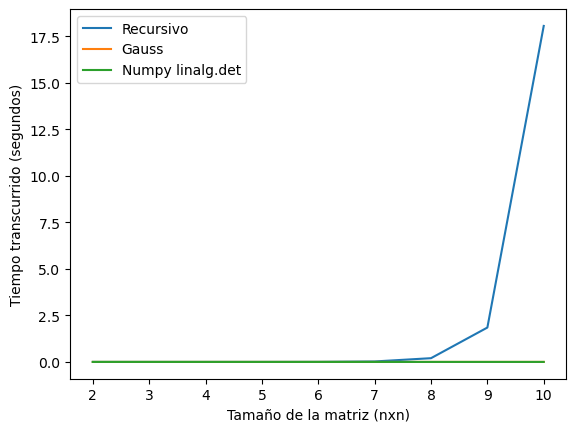

In [16]:
import matplotlib.pyplot as plt
# Crear una lista con los tamaños de las matrices para las que se quiere medir el tiempo transcurrido
tamaños = range(2, 11)

# Crear listas vacías para almacenar los tiempos transcurridos para cada método
tiempos_recursivo = []
tiempos_gauss = []
tiempos_linalg = []

# Medir el tiempo transcurrido para calcular el determinante de matrices de diferentes tamaños
for n in tamaños:
    # Crear una matriz aleatoria de tamaño nxn
    A = np.random.rand(n, n)

    # Medir el tiempo transcurrido para calcular el determinante utilizando la función determinante_recursivo
    start_time = time.perf_counter()
    det_A = determinante_recursivo(A)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    tiempos_recursivo.append(elapsed_time)

    # Medir el tiempo transcurrido para calcular el determinante utilizando la función determinante_gauss
    start_time = time.perf_counter()
    det_A = determinante_gauss(A)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    tiempos_gauss.append(elapsed_time)

    # Medir el tiempo transcurrido para calcular el determinante utilizando la función numpy.linalg.det
    start_time = time.perf_counter()
    det_A = np.linalg.det(A)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    tiempos_linalg.append(elapsed_time)

# Crear un gráfico que muestre cómo varía el tiempo transcurrido en función del tamaño de la matriz
plt.plot(tamaños, tiempos_recursivo, label="Recursivo")
plt.plot(tamaños, tiempos_gauss, label="Gauss")
plt.plot(tamaños, tiempos_linalg, label="Numpy linalg.det")
plt.legend()
plt.xlabel("Tamaño de la matriz (nxn)")
plt.ylabel("Tiempo transcurrido (segundos)")
plt.show()



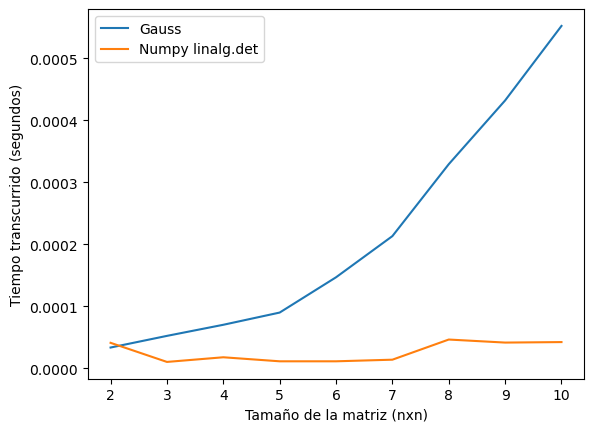

In [17]:
# Gráfico que muestra sólo los tiempos transcurridos para los métodos de Gauss y numpy.linalg.det
plt.plot(tamaños, tiempos_gauss, label="Gauss")
plt.plot(tamaños, tiempos_linalg, label="Numpy linalg.det")
plt.legend()
plt.xlabel("Tamaño de la matriz (nxn)")
plt.ylabel("Tiempo transcurrido (segundos)")
plt.show()

In [18]:
# Crear un DataFrame con los datos
data = {
    "Tamaño": list(tamaños),
    "Recursivo": tiempos_recursivo,
    "Gauss": tiempos_gauss,
    "Numpy linalg.det": tiempos_linalg
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
display(df)

,Tamaño,Recursivo,Gauss,Numpy linalg.det
0,2,0.000008,0.000033,0.000041
1,3,0.000039,0.000052,0.000010
2,4,0.000124,0.000070,0.000018
3,5,0.000619,0.000090,0.000011
4,6,0.003715,0.000147,0.000011
5,7,0.025156,0.000213,0.000014
6,8,0.200692,0.000329,0.000046
7,9,1.847475,0.000432,0.000041
8,10,18.058860,0.000552,0.000042


In [20]:
# Calcula la razón entre los tiempos de ejecución para diferentes tamaños del problema
for i in range(2, 10):
    # Selecciona dos filas consecutivas del dataframe
    row1 = df.loc[df['Tamaño'] == i]
    row2 = df.loc[df['Tamaño'] == i+1]
    
    # Calcula la razón entre los tiempos de ejecución para el método Recursivo
    ratio_recursive = row2['Recursivo'].values[0] / row1['Recursivo'].values[0]
    
    # Calcula la razón entre los tiempos de ejecución para el método Gauss
    ratio_gauss = row2['Gauss'].values[0] / row1['Gauss'].values[0]
    
    # Calcula el valor esperado para un costo computacional de n!
    expected_recursive = i+1
    
    # Calcula el valor esperado para un costo computacional de n^3
    expected_gauss = ((i+1)/i)**3
    
    # Imprime los resultados
    print(f"n={i} -> n={i+1}")
    print(f"Razón Recursivo: {ratio_recursive:.2f} (Esperado: {expected_recursive:.2f})")
    print(f"Razón Gauss: {ratio_gauss:.2f} (Esperado: {expected_gauss:.2f})")

n=2 -> n=3
Razón Recursivo: 4.68 (Esperado: 3.00)
Razón Gauss: 1.56 (Esperado: 3.38)
n=3 -> n=4
Razón Recursivo: 3.15 (Esperado: 4.00)
Razón Gauss: 1.34 (Esperado: 2.37)
n=4 -> n=5
Razón Recursivo: 5.00 (Esperado: 5.00)
Razón Gauss: 1.28 (Esperado: 1.95)
n=5 -> n=6
Razón Recursivo: 6.00 (Esperado: 6.00)
Razón Gauss: 1.63 (Esperado: 1.73)
n=6 -> n=7
Razón Recursivo: 6.77 (Esperado: 7.00)
Razón Gauss: 1.45 (Esperado: 1.59)
n=7 -> n=8
Razón Recursivo: 7.98 (Esperado: 8.00)
Razón Gauss: 1.54 (Esperado: 1.49)
n=8 -> n=9
Razón Recursivo: 9.21 (Esperado: 9.00)
Razón Gauss: 1.31 (Esperado: 1.42)
n=9 -> n=10
Razón Recursivo: 9.77 (Esperado: 10.00)
Razón Gauss: 1.28 (Esperado: 1.37)
